In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dir = '/glade/u/home/djk2120/UMBS_default/output/'
fil = '*.h1.*'
paths = sorted(glob.glob(dir+fil))

In [3]:
ds = xr.open_mfdataset(paths,combine='by_coords')
ds

<xarray.Dataset>
Dimensions:       (hist_interval: 2, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, nvegwcs: 4, time: 262992)
Coordinates:
  * levdcmp       (levdcmp) float32 1.0
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * time          (time) datetime64[ns] 1999-01-01T01:00:00.000107288 ... 2018-01-01
Dimensions without coordinates: hist_interval, levsoi, lndgrid, nvegwcs
Data variables:
    BTRAN         (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    COSZEN        (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    ELAI          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    ESAI          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    FCEV          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    FCTR     

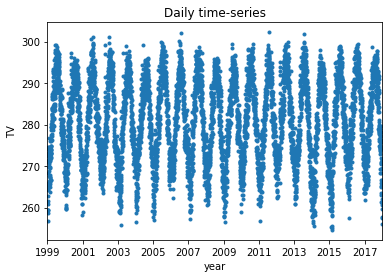

In [4]:
g = ds['time.year']+ds['time.dayofyear']/366
g.name = 'year'
ds['TV'].groupby(g).mean(dim=xr.ALL_DIMS).plot.line('.')
plt.title('Daily time-series')
plt.xlim([1999,2018])
ax = plt.xticks(1999+2*np.arange(10))

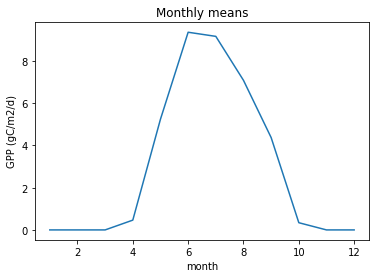

In [5]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means');

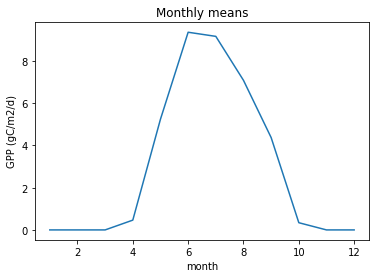

In [6]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means');

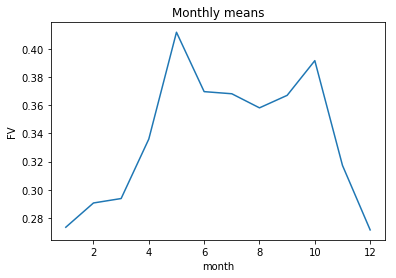

In [7]:
xf = 24*60*60*12/1e6
(xf*ds['FV']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.title('Monthly means');

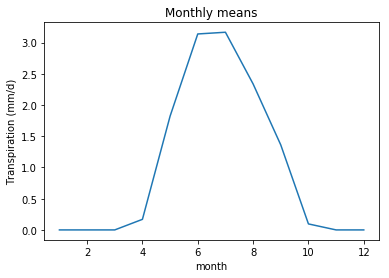

In [8]:
xf = 24*60*60/2.5e6
(xf*ds['FCTR']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('Transpiration (mm/d)')
plt.title('Monthly means');

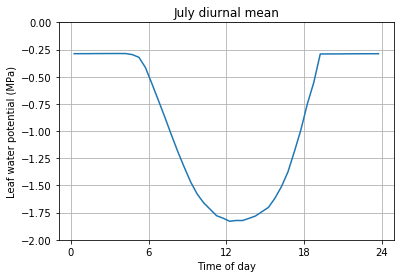

In [31]:
xf = 1/101972
ds2 = ds.swap_dims({'time':'mcsec'})
ix = np.logical_and(ds2['time.month']==7,ds2['time.year']>2006)
lwp = xf*ds2['VEGWP'][ix,0].groupby('mcsec').mean(dim=xr.ALL_DIMS).values
lwp_diurnal = np.zeros(48)
lwp_diurnal[:34] = lwp[14:]
lwp_diurnal[34:] = lwp[:14]


plt.plot(0.25+np.arange(48)/2,lwp_diurnal)
plt.xticks(6*np.arange(5))
plt.ylim([-2,0])
plt.grid()
plt.ylabel('Leaf water potential (MPa)')
plt.xlabel('Time of day')
plt.title('July diurnal mean');

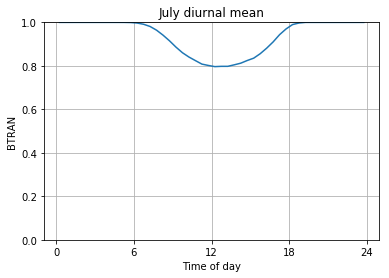

In [35]:

ds2 = ds.swap_dims({'time':'mcsec'})
ix = np.logical_and(ds2['time.month']==7,ds2['time.year']>2006)
bt = ds2['BTRAN'][ix,0].groupby('mcsec').mean(dim=xr.ALL_DIMS).values
bt_diurnal = np.zeros(48)
bt_diurnal[:34] = lwp[14:]
bt_diurnal[34:] = lwp[:14]


plt.plot(0.25+np.arange(48)/2,bt_diurnal)
plt.xticks(6*np.arange(5))
plt.ylim([0,1])
plt.grid()
plt.ylabel('BTRAN')
plt.xlabel('Time of day')
plt.title('July diurnal mean');

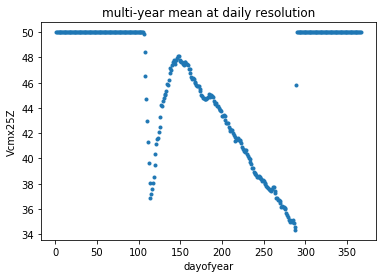

In [32]:
ds['Vcmx25Z'].groupby('time.dayofyear').mean(dim=xr.ALL_DIMS).plot.line('.')
plt.title('multi-year mean at daily resolution');